## PRODIGY INFOTECH INTERNSHIP TASK2

## Importing the libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv(r"C:\Users\Dheek\Downloads\Titanic-Dataset.csv")

In [36]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:

df.shape

(891, 12)

In [38]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
df.drop(columns="Cabin",axis=1,inplace=True)

In [42]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [43]:

df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [44]:
df.isnull().sum().sum()

np.int64(0)

## Checking for duplicate values in dataset

In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Visualization of survival of people

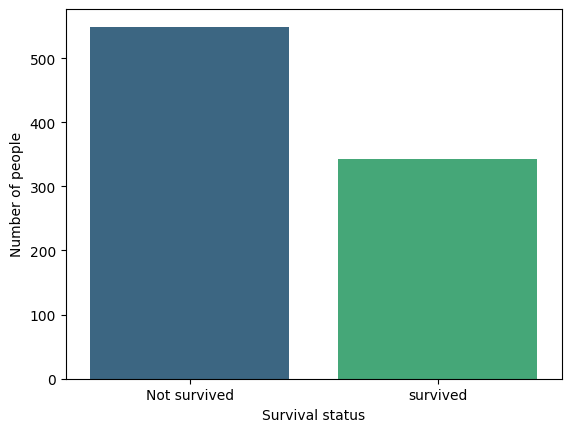

In [47]:
sns.countplot(x='Survived',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

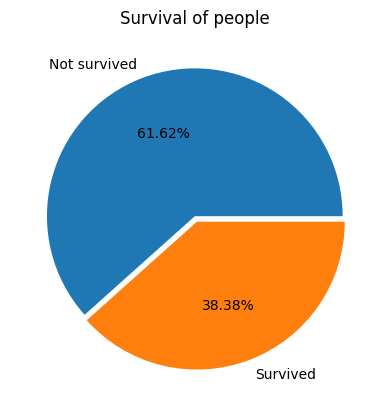

In [48]:
plt.pie(df['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

## Visualization of people survived from different gender

In [49]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

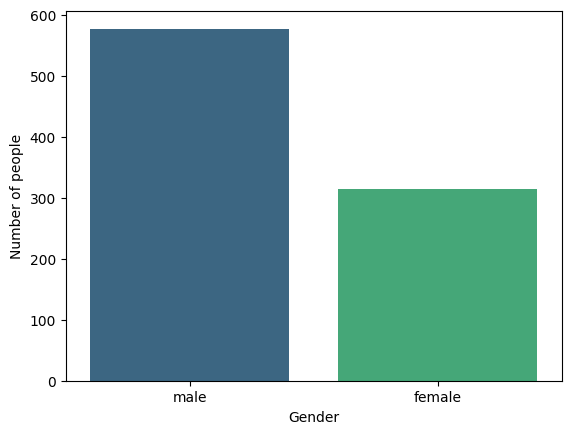

In [50]:
sns.countplot(x='Sex',data=df,palette='viridis',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

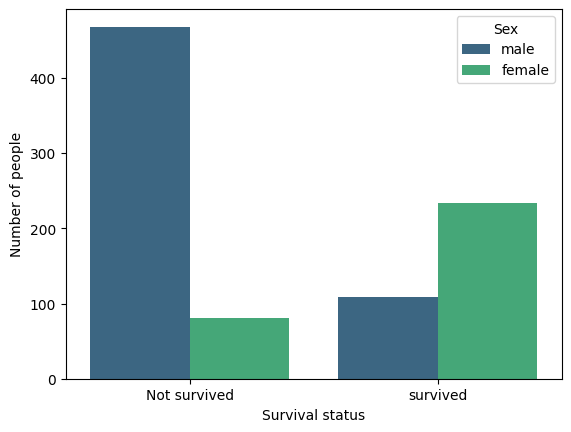

In [51]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()


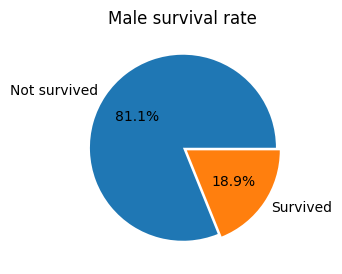

In [52]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()

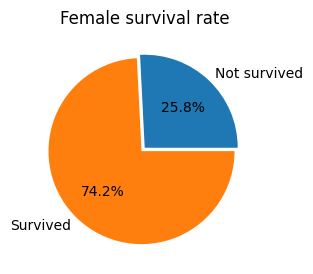

In [54]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

## visualizing the population of different passenger class

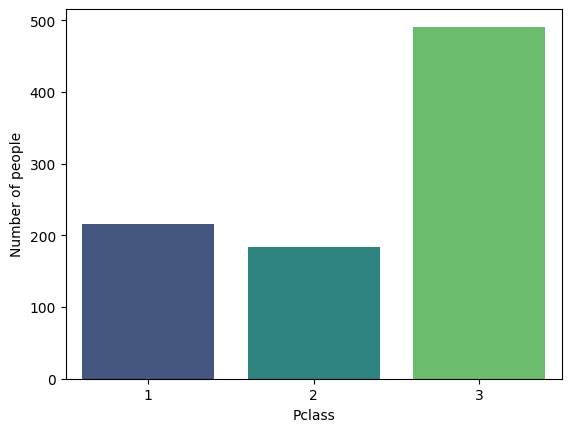

In [55]:
sns.countplot(x='Pclass',data=df,palette='viridis',)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()


## Visualization of people survived from different passenger class

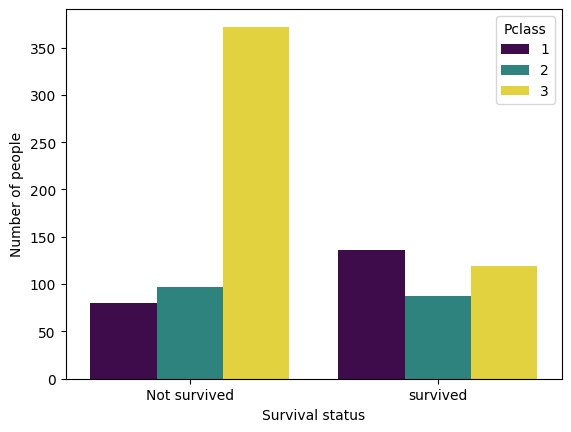

In [56]:
sns.countplot(x='Survived',hue='Pclass',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

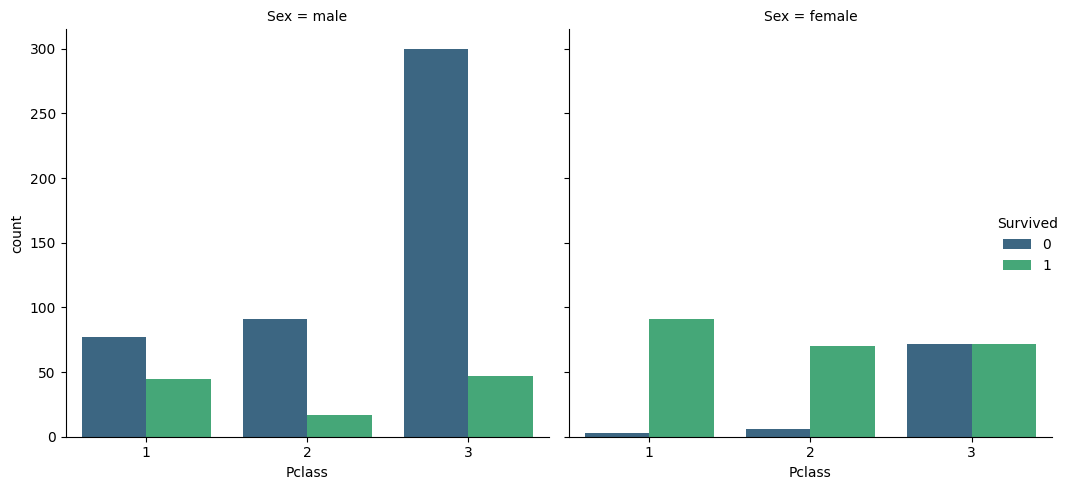

In [57]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data =
df,palette='viridis' )
plt.tight_layout()

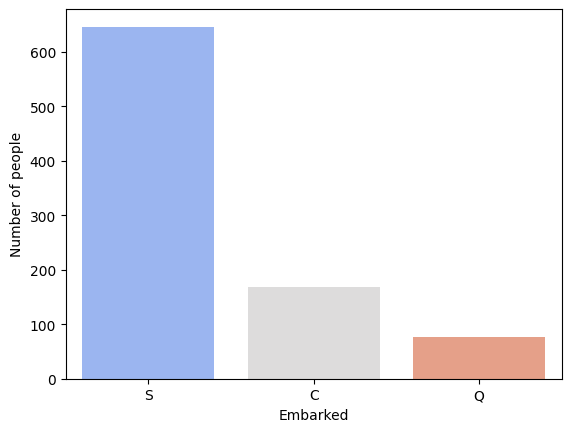

In [58]:
sns.countplot(x='Embarked',data=df,palette='coolwarm',)
plt.xlabel("Embarked")
plt.ylabel("Number of people")
plt.show()

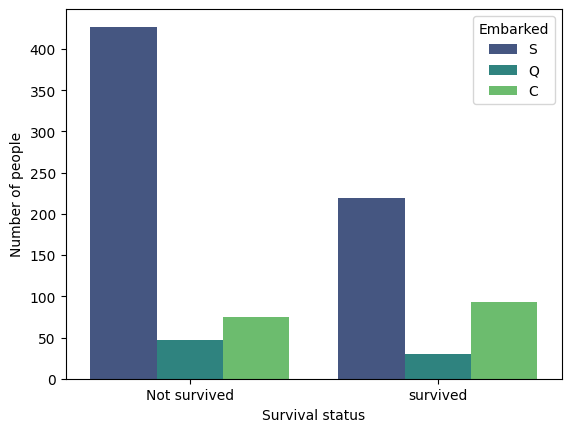

In [59]:
sns.countplot(x='Survived',hue='Embarked',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

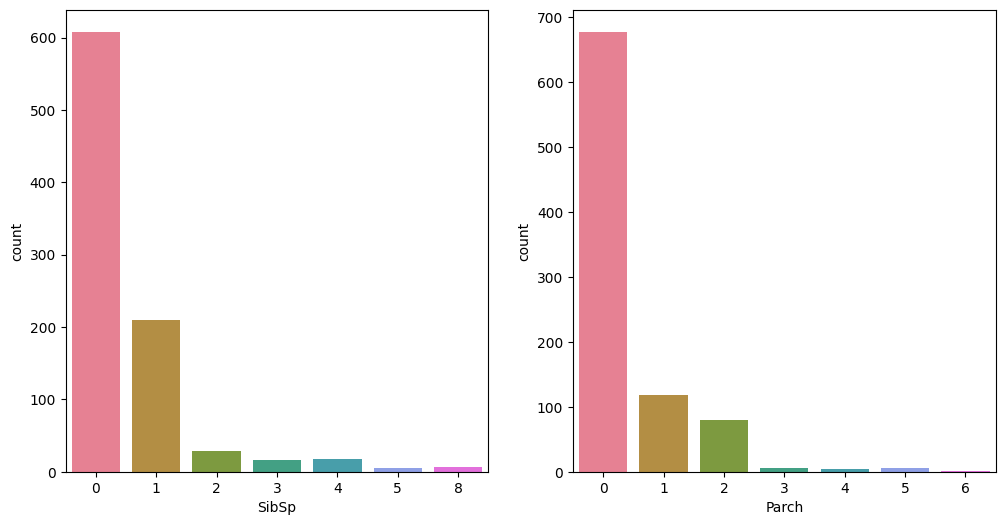

In [60]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')
plt.show()

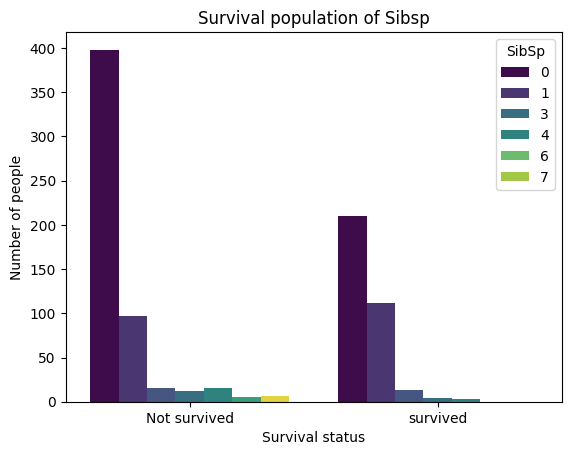

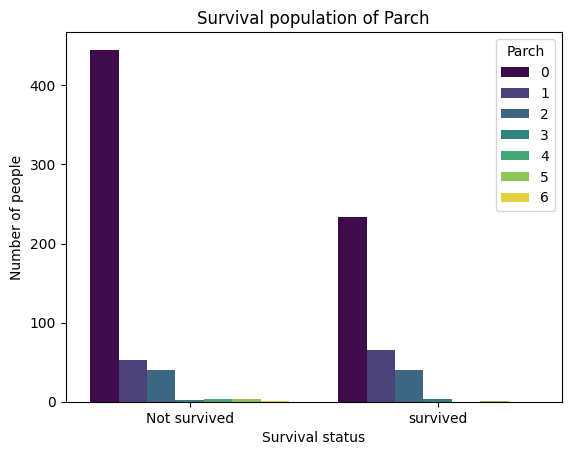

In [61]:
sns.countplot(x ='Survived', hue='SibSp',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()


## Distribution of Fare and age

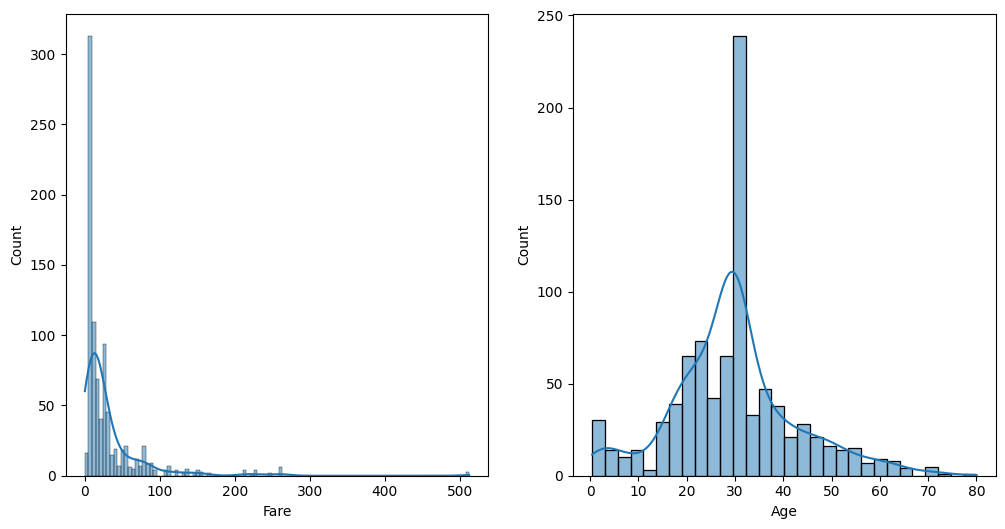

In [62]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Fare'], kde=True,ax=axes[0])
sns.histplot(df['Age'].dropna(),kde=True,ax=axes[1])
plt.show()


## Visualizing survival rate in different age category

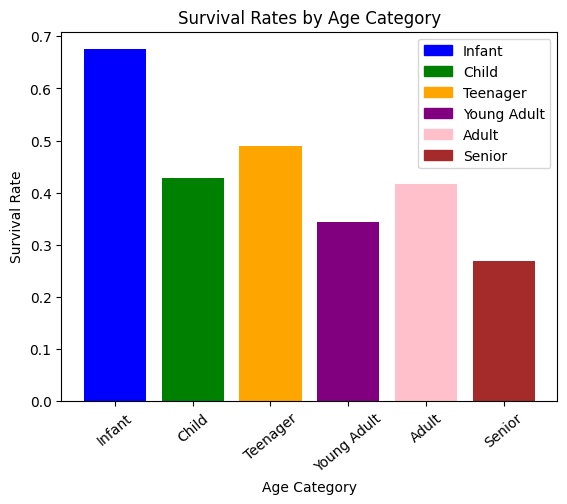

In [63]:
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
df['Age_categories'] = pd.cut(df['Age'], bins=cut_points, labels=label_names,right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

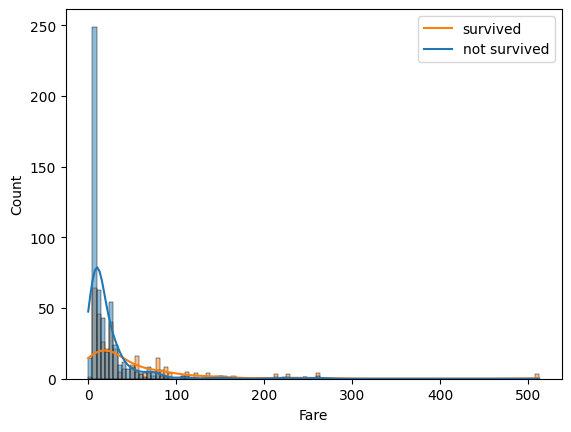

In [64]:
sns.histplot(x='Fare',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

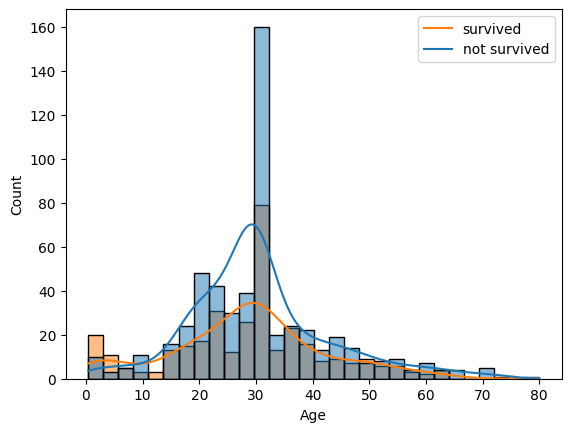

In [65]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

## Checking for correlation

In [66]:
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,Adult


In [68]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

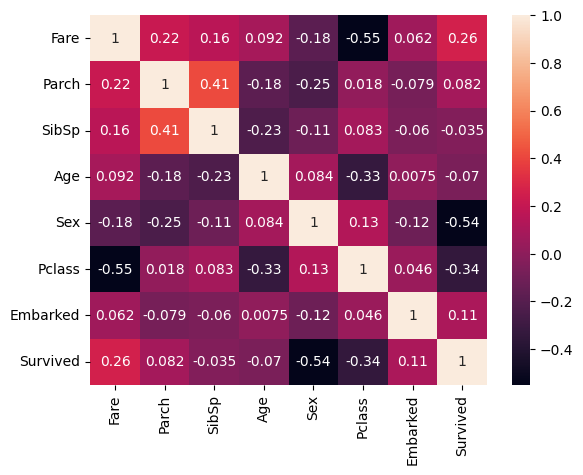

In [69]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()